In [1]:
import numpy as np
import numpy.linalg as alg
import numpy.random as r
import scipy.linalg as alg
import scipy.sparse as spa
import functools
from matplotlib import pyplot as plt 
from matplotlib import cm
from time import time
from scipy.linalg import lu as lu
from scipy.linalg import solve_triangular as st
from scipy.linalg import solve_triangular as ss
from scipy.sparse.linalg import spsolve as sps
from sys import getsizeof
from time import time

# Low-precision round-off
We considering the following problems. Given a sequence of numbers $\{ \alpha_n \}_{n = 1}^N$ in $[0, 1]$, i.e. $\alpha_n \in [0, 1]$. Introduce an algorithm of complexity $O(n)$ to return a sequence $\{ \beta_n \}_{n = 1}^N$ of $0, 1$, i.e. $\beta \in \{0, 1\}$, s.t. $\alpha - \beta$ has small Fourier coefficient, i.e. at least the first several coefficients should be of order $O(N^{-1})$.

Using CLT, it is easy to show that if one randomly chooses the sequence $\beta$, then all the coefficients should be of order $O(N^{-\frac{1}{2}})$. However, it is also reasonable to imagine that this coefficients are of order $O(N^{-1})$.
## Brute-force algorithm
In this algorithm, we directly run through the first several Fourier coefficients and modify the round-off sequence in order to make this coefficients small. The point here is that it is hard to balance between different coefficient, namely, when modifying larger Fourier coefficients, it is hard to make the smaller coefficients remain small.

In [36]:
num      = 7
cof_num  = 10
MyFFT    = np.zeros([num, cof_num])
n_array  = np.power(2, np.linspace(7, 7 + num - 1, num))
for j in range(num):
    for l in range(100):
        n    = int(n_array[j])
        a    = r.rand(n)

        # randomly initialized the e sequence
        e    = np.zeros(n)
        e[0:n:2] = 1

        # modified the first Fourier coeff
        f1   = np.sum(a)               # First Fourier coeff
        sgn  = np.sign(suma - n / 2) 
        k    = int(np.floor(suma - n / 2) * sgn)
        if k != 0:
            w    = int(np.floor(n / k / 2) * 2)
            bias = 0
            if sgn == 1:
                bias = 1
            for i in range(k):
                e[i * w + bias] = 1 - e[i * w + bias]

        # modified the second Fourier coeff
        f2   = (a - e).T @ np.exp(2j * np.pi * np.linspace(0, (n - 1)/n, n))
        f2arg = np.log(f2).imag
        f2abs = np.abs(f2)
        theta = int(np.floor(f2arg * n / 2 / np.pi))
        t     = 0
        m     = 0
        n2    = int(n/2)
        theta1 = theta
        theta2 = np.mod(theta + n2, n)
        while t < f2abs:
            if e[np.mod(theta1 + m, n)] == 1:
                e[np.mod(theta1 + m, n)] = 0
                t += 1
            if e[np.mod(theta1 - m, n)] == 1:
                e[np.mod(theta1 - m, n)] = 0
                t += 1
            if e[np.mod(theta2 + m, n)] == 0:
                e[np.mod(theta2 + m, n)] = 1
                t += 1
            if e[np.mod(theta2 - m, n)] == 0:
                e[np.mod(theta2 - m, n)] = 1
                t += 1
            m += 1
        
        MyFFT[j, :] += np.abs(np.fft.fft(a - e)[:cof_num])
        
MyFFT /= 1000

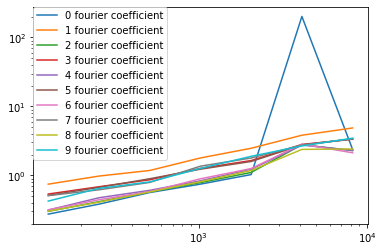

In [37]:
for i in range(cof_num):
    plt.plot(n_array, MyFFT[:, i], label = str(i) + ' fourier coefficient')
plt.legend(loc = 'upper left', borderaxespad = 0.)
plt.semilogy()
plt.semilogx()
plt.show()